### PCA

In [1]:
from sklearn.decomposition import PCA

In [2]:
#dir(PCA)

In [3]:
pca=PCA()

In [4]:
#dir(pca)

In [5]:
import pandas as pd
d=pd.read_csv("mnist_train.csv")

In [6]:
d.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
s=d["label"]

In [8]:
d.drop(columns="label",inplace=True)

In [9]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(d.shape,s.shape)

(42000, 784) (42000,)


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scalar=StandardScaler()
std_data=scalar.fit_transform(d.values)

In [13]:
std_data.shape

(42000, 784)

In [14]:
pca.n_components=2
pca.fit(d)

PCA(n_components=2)

In [15]:
data=pca.transform(d)

In [16]:
pca.transform(d).shape

(42000, 2)

In [17]:
import numpy as np
fg=np.vstack((data.T,s)).T
fg.shape

(42000, 3)

In [18]:
import numpy as np
fg=np.vstack((data.transpose(),s)).transpose()
fg.shape

(42000, 3)

In [19]:
df=pd.DataFrame(fg,columns=["1st","2nd","labels"])
df.head()

,1st,2nd,labels
0,-661.595876,-699.313030,1.0
1,1701.451618,-360.547221,0.0
2,-886.894413,-293.765394,1.0
3,-165.755609,300.183442,4.0
4,1923.709567,-449.147942,0.0


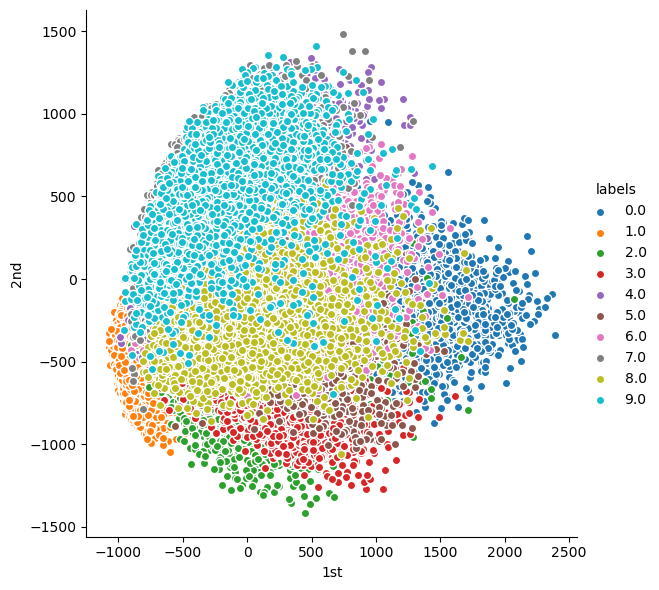

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(df, hue ="labels",height=6).map(plt.scatter, "1st", "2nd",edgecolor ="w").add_legend()
plt.show()

### TSNE

In [22]:
from sklearn.manifold import TSNE

In [38]:
a=std_data
b=s

In [39]:
model=TSNE()

In [40]:
tsne_data=model.fit_transform(a)

C:\Users\scman\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\scman\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [41]:
tsne_data.shape

(42000, 2)

In [42]:
import numpy as np
hh=np.vstack((tsne_data.T,b)).T
hh.shape

(42000, 3)

In [43]:
df1=pd.DataFrame(hh,columns=["1st","2nd","labels"])
df1.head()

,1st,2nd,labels
0,1.269003,24.972071,1.0
1,49.207428,-5.502395,0.0
2,-6.836482,57.210575,1.0
3,-36.213078,33.445049,4.0
4,57.316315,-5.409855,0.0


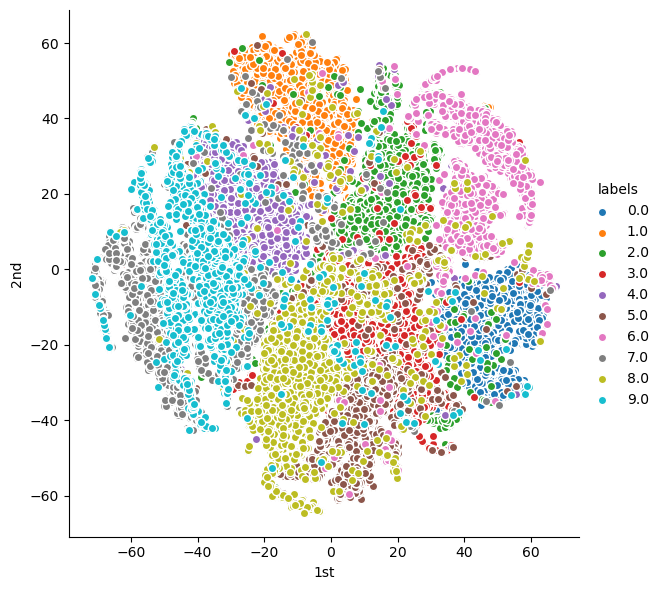

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(df1, hue ="labels",height=6).map(plt.scatter, "1st", "2nd",edgecolor ="w").add_legend()
plt.show()